In [22]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, log_loss, confusion_matrix, precision_recall_curve, auc, accuracy_score, classification_report
import joblib

In [23]:
RANDOM_SEED = 42

os.environ['PYTHONHASHSEED']=str(RANDOM_SEED)

random.seed(RANDOM_SEED)

np.random.seed(RANDOM_SEED)

In [24]:
mitbih_train = pd.read_csv('mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('mitbih_test.csv', header=None)

X_train = mitbih_train.iloc[:, :-1].values
y_train = mitbih_train.iloc[:, -1].values
X_test = mitbih_test.iloc[:, :-1].values
y_test = mitbih_test.iloc[:, -1].values

In [25]:
def print_avg_and_mean(dict):
    # Ponderado
    weighted_avg_precision = dict['weighted avg']['precision']
    weighted_avg_recall = dict['weighted avg']['recall']
    weighted_avg_f1_score = dict['weighted avg']['f1-score']
    weighted_avg_support = dict['weighted avg']['support']

    # Aritmético
    mean_precision = np.mean([dict[label]["precision"] for label in dict.keys() if label != "accuracy"])
    mean_recall = np.mean([dict[label]["recall"] for label in dict.keys() if label != "accuracy"]
    )
    mean_f1_score = np.mean([dict[label]["f1-score"] for label in dict.keys() if label != "accuracy"])
    mean_support = np.mean([dict[label]["support"] for label in dict.keys() if label != "accuracy"])

    print(f'Média Ponderada - Precisão: {weighted_avg_precision}')
    print(f'Média Ponderada - Recall: {weighted_avg_recall}')
    print(f'Média Ponderada - F1-Score: {weighted_avg_f1_score}')
    print(f'Média Ponderada - Support: {weighted_avg_support}')
    print('--------------------------------------------------')
    print(f'Média Aritmética - Precisão: {mean_precision}')
    print(f'Média Aritmética - Recall: {mean_recall}')
    print(f'Média Aritmética - F1-Score: {mean_f1_score}')
    print(f'Média Aritmética - Support: {mean_support}')

Treino: 87554
Teste:  21892
Total: 109446


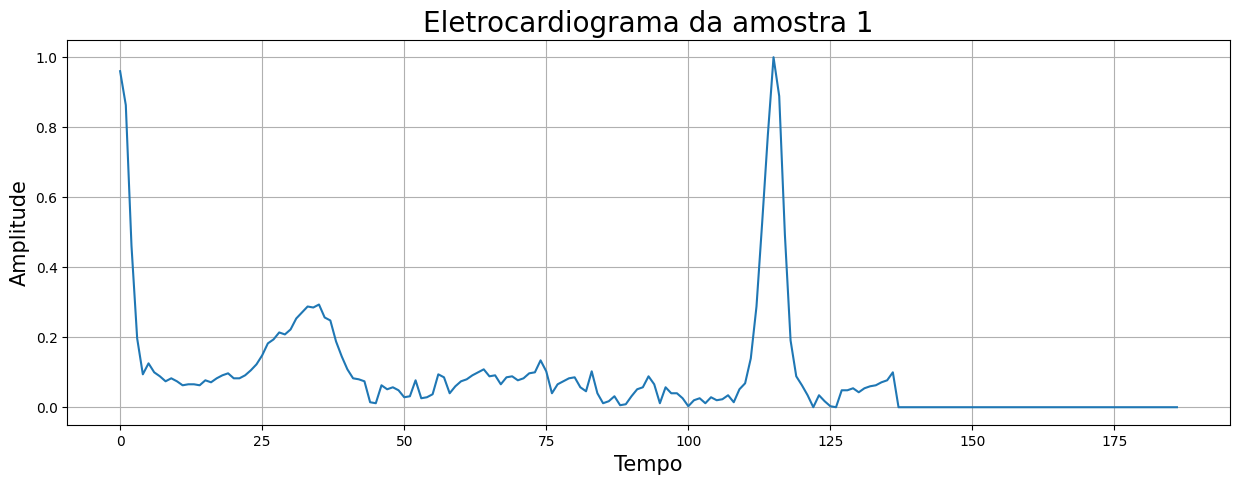

[0. 1. 2. 3. 4.]


In [8]:
index = 1 
ecg_sample = X_train[index]
print('Treino:', len(X_train))
print("Teste: ", len(X_test))
print('Total:', len(X_train) + len(X_test))

plt.figure(figsize=(15, 5))
plt.plot(ecg_sample)
plt.title(f'Eletrocardiograma da amostra {index}', fontsize=20)
plt.xlabel('Tempo', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.grid(True)
plt.show()
print(np.unique(y_train))

# Treinando modelo com seus parâmetros default

In [10]:
pipeline = make_pipeline(StandardScaler(), SVC())

pipeline.fit(X_train, y_train)

classification_report_dict = classification_report(y_test, pipeline.predict(X_test), output_dict=True)

In [ ]:
classification_report_dict.keys()

dict_keys(['0.0', '1.0', '2.0', '3.0', '4.0', 'accuracy', 'macro avg', 'weighted avg'])

In [ ]:
classification_report_dict

{'0.0': {'precision': 0.9684052693584663,
  'recall': 0.9981234131802628,
  'f1-score': 0.9830397912589693,
  'support': 18118.0},
 '1.0': {'precision': 0.9573170731707317,
  'recall': 0.564748201438849,
  'f1-score': 0.7104072398190046,
  'support': 556.0},
 '2.0': {'precision': 0.963984674329502,
  'recall': 0.8687845303867403,
  'f1-score': 0.9139120958953868,
  'support': 1448.0},
 '3.0': {'precision': 0.7904761904761904,
  'recall': 0.5123456790123457,
  'f1-score': 0.6217228464419475,
  'support': 162.0},
 '4.0': {'precision': 0.9952702702702703,
  'recall': 0.9160447761194029,
  'f1-score': 0.9540155440414507,
  'support': 1608.0},
 'accuracy': 0.9689384249954321,
 'macro avg': {'precision': 0.935090695521032,
  'recall': 0.7720093200275201,
  'f1-score': 0.8366195034913518,
  'support': 21892.0},
 'weighted avg': {'precision': 0.9684878726841072,
  'recall': 0.9689384249954321,
  'f1-score': 0.966737720362148,
  'support': 21892.0}}

In [ ]:
weighted_avg_precision = classification_report_dict['weighted avg']['precision']
weighted_avg_recall = classification_report_dict['weighted avg']['recall']
weighted_avg_f1_score = classification_report_dict['weighted avg']['f1-score']

print(f'Média Ponderada - Precisão: {weighted_avg_precision:.2f}')
print(f'Média Ponderada - Recall: {weighted_avg_recall:.2f}')
print(f'Média Ponderada - F1-Score: {weighted_avg_f1_score:.2f}')
print(f'Média Ponderada - Support: {classification_report_dict["weighted avg"]["support"]:.2f}')
print('--------------------------------------------------')
print(f'Média Aritmética - Precisão: {np.mean([classification_report_dict[label]["precision"] for label in classification_report_dict.keys() if label != "accuracy"]):.2f}')
print(f'Média Aritmética - Recall: {np.mean([classification_report_dict[label]["recall"] for label in classification_report_dict.keys() if label != "accuracy"]):.2f}')
print(f'Média Aritmética - F1-Score: {np.mean([classification_report_dict[label]["f1-score"] for label in classification_report_dict.keys() if label != "accuracy"]):.2f}')
print(f'Média Aritmética - Support: {np.mean([classification_report_dict[label]["support"] for label in classification_report_dict.keys() if label != "accuracy"]):.2f}')

Média Ponderada - Precisão: 0.97
Média Ponderada - Recall: 0.97
Média Ponderada - F1-Score: 0.97
Média Ponderada - Support: 21892.00
--------------------------------------------------
Média Aritmética - Precisão: 0.94
Média Aritmética - Recall: 0.80
Média Aritmética - F1-Score: 0.86
Média Aritmética - Support: 9382.29


# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’} or callable, default=’rbf’
<ul>
<li>linear</li>
<li>poly</li>
<li>rbf</li>
<li>sigmoid</li>
</ul>

In [7]:
pipeline_linear = make_pipeline(StandardScaler(), SVC(kernel='linear'))
pipeline_linear.fit(X_train, y_train)
classification_report_dict_linear = classification_report(y_test, pipeline_linear.predict(X_test), output_dict=True)

In [29]:
print_avg_and_mean(classification_report_dict_linear)

Média Ponderada - Precisão: 0.92
Média Ponderada - Recall: 0.92
Média Ponderada - F1-Score: 0.91
Média Ponderada - Support: 21892.00
--------------------------------------------------
Média Aritmética - Precisão: 0.86
Média Aritmética - Recall: 0.65
Média Aritmética - F1-Score: 0.72
Média Aritmética - Support: 9382.29


In [8]:
pipeline_poly = make_pipeline(StandardScaler(), SVC(kernel='poly'))
pipeline_poly.fit(X_train, y_train)
classification_report_dict_poly = classification_report(y_test, pipeline_poly.predict(X_test), output_dict=True)

In [30]:
print_avg_and_mean(classification_report_dict_poly)

Média Ponderada - Precisão: 0.96
Média Ponderada - Recall: 0.96
Média Ponderada - F1-Score: 0.95
Média Ponderada - Support: 21892.00
--------------------------------------------------
Média Aritmética - Precisão: 0.92
Média Aritmética - Recall: 0.74
Média Aritmética - F1-Score: 0.81
Média Aritmética - Support: 9382.29


In [9]:
pipeline_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
pipeline_rbf.fit(X_train, y_train)
classification_report_dict_rbf = classification_report(y_test, pipeline_rbf.predict(X_test), output_dict=True)

In [31]:
print_avg_and_mean(classification_report_dict_poly)

Média Ponderada - Precisão: 0.96
Média Ponderada - Recall: 0.96
Média Ponderada - F1-Score: 0.95
Média Ponderada - Support: 21892.00
--------------------------------------------------
Média Aritmética - Precisão: 0.92
Média Aritmética - Recall: 0.74
Média Aritmética - F1-Score: 0.81
Média Aritmética - Support: 9382.29


In [10]:
pipeline_sigmoid = make_pipeline(StandardScaler(), SVC(kernel='sigmoid'))
pipeline_sigmoid.fit(X_train, y_train)
classification_report_dict_sigmoid = classification_report(y_test, pipeline_sigmoid.predict(X_test), output_dict=True)

In [32]:
print_avg_and_mean(classification_report_dict_sigmoid)

Média Ponderada - Precisão: 0.75
Média Ponderada - Recall: 0.79
Média Ponderada - F1-Score: 0.76
Média Ponderada - Support: 21892.00
--------------------------------------------------
Média Aritmética - Precisão: 0.40
Média Aritmética - Recall: 0.36
Média Aritmética - F1-Score: 0.37
Média Aritmética - Support: 9382.29


In [41]:
table_data = [
    ['linear', 
     classification_report_dict_linear['weighted avg']['precision'],
     classification_report_dict_linear['weighted avg']['recall'],
     classification_report_dict_linear['weighted avg']['f1-score'],
     classification_report_dict_linear['weighted avg']['support'],
     classification_report_dict_linear['macro avg']['precision'],
     classification_report_dict_linear['macro avg']['recall'],
     classification_report_dict_linear['macro avg']['f1-score'],
     classification_report_dict_linear['macro avg']['support']
    ],
    ['poly', 
     classification_report_dict_poly['weighted avg']['precision'],
     classification_report_dict_poly['weighted avg']['recall'],
     classification_report_dict_poly['weighted avg']['f1-score'],
     classification_report_dict_poly['weighted avg']['support'],
     classification_report_dict_poly['macro avg']['precision'],
     classification_report_dict_poly['macro avg']['recall'],
     classification_report_dict_poly['macro avg']['f1-score'],
     classification_report_dict_poly['macro avg']['support']
    ],
    ['rbf', 
     classification_report_dict_rbf['weighted avg']['precision'],
     classification_report_dict_rbf['weighted avg']['recall'],
     classification_report_dict_rbf['weighted avg']['f1-score'],
     classification_report_dict_rbf['weighted avg']['support'],
     classification_report_dict_rbf['macro avg']['precision'],
     classification_report_dict_rbf['macro avg']['recall'],
     classification_report_dict_rbf['macro avg']['f1-score'],
     classification_report_dict_rbf['macro avg']['support']
    ],
    ['sigmoid', 
     classification_report_dict_sigmoid['weighted avg']['precision'],
     classification_report_dict_sigmoid['weighted avg']['recall'],
     classification_report_dict_sigmoid['weighted avg']['f1-score'],
     classification_report_dict_sigmoid['weighted avg']['support'],
     classification_report_dict_sigmoid['macro avg']['precision'],
     classification_report_dict_sigmoid['macro avg']['recall'],
     classification_report_dict_sigmoid['macro avg']['f1-score'],
     classification_report_dict_sigmoid['macro avg']['support']
    ]
]

headers = [
    "Kernel",
    "Ponderada - Precisão", "Ponderada - Recall", "Ponderada - F1-Score", "Ponderada - Suporte",
    "Aritmética - Precisão", "Aritmética - Recall", "Aritmética - F1-Score", "Aritmética - Suporte"
]


In [42]:
print(tabulate(table_data, headers=headers, floatfmt=".2f"))

Kernel      Ponderada - Precisão    Ponderada - Recall    Ponderada - F1-Score    Ponderada - Suporte    Aritmética - Precisão    Aritmética - Recall    Aritmética - F1-Score    Aritmética - Suporte
--------  ----------------------  --------------------  ----------------------  ---------------------  -----------------------  ---------------------  -----------------------  ----------------------
linear                      0.92                  0.92                    0.91               21892.00                     0.85                   0.61                     0.69                21892.00
poly                        0.96                  0.96                    0.95               21892.00                     0.91                   0.71                     0.78                21892.00
rbf                         0.97                  0.97                    0.97               21892.00                     0.94                   0.77                     0.84                21892.00
sigmo

### Melhor resultado foi kenel=rbf

# gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
<ul>
<li>if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,</li>

<li>if ‘auto’, uses 1 / n_features</li>

<li>if float, must be non-negative.</li>
</ul>

In [11]:
pipeline_rbf_scale = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='scale'))
pipeline_rbf_scale.fit(X_train, y_train)
classification_report_dict_linear_scale = classification_report(y_test, pipeline_rbf_scale.predict(X_test), output_dict=True)

In [12]:
print_avg_and_mean(classification_report_dict_linear_scale)

Média Ponderada - Precisão: 0.97
Média Ponderada - Recall: 0.97
Média Ponderada - F1-Score: 0.97
Média Ponderada - Support: 21892.00
--------------------------------------------------
Média Aritmética - Precisão: 0.94
Média Aritmética - Recall: 0.80
Média Aritmética - F1-Score: 0.86
Média Aritmética - Support: 9382.29


In [13]:
pipeline_kbf_auto = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
pipeline_kbf_auto.fit(X_train, y_train)
classification_report_dict_kbf_auto = classification_report(y_test, pipeline_kbf_auto.predict(X_test), output_dict=True)

In [14]:
print_avg_and_mean(classification_report_dict_kbf_auto)

Média Ponderada - Precisão: 0.97
Média Ponderada - Recall: 0.97
Média Ponderada - F1-Score: 0.97
Média Ponderada - Support: 21892.00
--------------------------------------------------
Média Aritmética - Precisão: 0.94
Média Aritmética - Recall: 0.80
Média Aritmética - F1-Score: 0.86
Média Aritmética - Support: 9382.29


In [17]:
table_data = [
    ['scale', 
     classification_report_dict_linear_scale['weighted avg']['precision'],
     classification_report_dict_linear_scale['weighted avg']['recall'],
     classification_report_dict_linear_scale['weighted avg']['f1-score'],
     classification_report_dict_linear_scale['weighted avg']['support'],
     classification_report_dict_linear_scale['macro avg']['precision'],
     classification_report_dict_linear_scale['macro avg']['recall'],
     classification_report_dict_linear_scale['macro avg']['f1-score'],
     classification_report_dict_linear_scale['macro avg']['support']
    ],
    ['auto', 
     classification_report_dict_kbf_auto['weighted avg']['precision'],
     classification_report_dict_kbf_auto['weighted avg']['recall'],
     classification_report_dict_kbf_auto['weighted avg']['f1-score'],
     classification_report_dict_kbf_auto['weighted avg']['support'],
     classification_report_dict_kbf_auto['macro avg']['precision'],
     classification_report_dict_kbf_auto['macro avg']['recall'],
     classification_report_dict_kbf_auto['macro avg']['f1-score'],
     classification_report_dict_kbf_auto['macro avg']['support']
    ]
]

headers = [
    "gamma",
    "Ponderada - Precisão", "Ponderada - Recall", "Ponderada - F1-Score", "Ponderada - Suporte",
    "Aritmética - Precisão", "Aritmética - Recall", "Aritmética - F1-Score", "Aritmética - Suporte"
]


In [18]:
print(tabulate(table_data, headers=headers, floatfmt=".2f"))

gamma      Ponderada - Precisão    Ponderada - Recall    Ponderada - F1-Score    Ponderada - Suporte    Aritmética - Precisão    Aritmética - Recall    Aritmética - F1-Score    Aritmética - Suporte
-------  ----------------------  --------------------  ----------------------  ---------------------  -----------------------  ---------------------  -----------------------  ----------------------
scale                      0.97                  0.97                    0.97               21892.00                     0.94                   0.77                     0.84                21892.00
auto                       0.97                  0.97                    0.97               21892.00                     0.94                   0.77                     0.84                21892.00


### Melhor gamma = [scale, auto]
####  - Ambos os gamma obtiveram um bons desempenhos

# C : float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty. For an intuitive visualization of the effects of scaling the regularization parameter C, see Scaling the regularization parameter for SVCs.

In [23]:
pipeline = make_pipeline(StandardScaler(), SVC())

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

y_pred = grid_search.predict(X_test)
classification_report_dict_c = classification_report(y_test, y_pred, output_dict=True)

Melhores hiperparâmetros: {'svc__C': 100, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [24]:
print_avg_and_mean(classification_report_dict_c)

Média Ponderada - Precisão: 0.98
Média Ponderada - Recall: 0.98
Média Ponderada - F1-Score: 0.98
Média Ponderada - Support: 21892.00
--------------------------------------------------
Média Aritmética - Precisão: 0.94
Média Aritmética - Recall: 0.89
Média Aritmética - F1-Score: 0.91
Média Aritmética - Support: 9382.29


In [28]:
pipeline = make_pipeline(StandardScaler(), SVC())

param_grid = {
    'svc__C': [50, 75, 100, 125, 150],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf']
}

grid_search2 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search2.fit(X_train, y_train)

print(f"Melhores hiperparâmetros: {grid_search2.best_params_}")

y_pred = grid_search2.predict(X_test)
classification_report_dict2 = classification_report(y_test, y_pred, output_dict=True)

Melhores hiperparâmetros: {'svc__C': 75, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [29]:
print_avg_and_mean(classification_report_dict2)

Média Ponderada - Precisão: 0.98
Média Ponderada - Recall: 0.98
Média Ponderada - F1-Score: 0.98
Média Ponderada - Support: 21892.00
--------------------------------------------------
Média Aritmética - Precisão: 0.95
Média Aritmética - Recall: 0.88
Média Aritmética - F1-Score: 0.91
Média Aritmética - Support: 9382.29


# shrinkingbool, default=True
Whether to use the shrinking heuristic. See the User Guide.

In [30]:
pipeline = make_pipeline(StandardScaler(), SVC())

param_grid = {
    'svc__C': [75],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf'],
    'svc__shrinking': [True, False]
}

grid_search3 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search3.fit(X_train, y_train)

print(f"Melhores hiperparâmetros: {grid_search3.best_params_}")

y_pred = grid_search3.predict(X_test)
classification_report_dict2 = classification_report(y_test, y_pred, output_dict=True)

Melhores hiperparâmetros: {'svc__C': 75, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__shrinking': True}


# max_iterint, default=-1
Hard limit on iterations within solver, or -1 for no limit.

In [32]:
pipeline = make_pipeline(StandardScaler(), SVC())

param_grid = {
    'svc__C': [75],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf'],
    'svc__shrinking': [True],
    'svc__max_iter': [1000, 5000, 10000]  
}

grid_search4 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search4.fit(X_train, y_train)

print(f"Melhores hiperparâmetros: {grid_search4.best_params_}")

y_pred = grid_search4.predict(X_test)
classification_report_dict2 = classification_report(y_test, y_pred, output_dict=True)

/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/

Melhores hiperparâmetros: {'svc__C': 75, 'svc__gamma': 'auto', 'svc__kernel': 'rbf', 'svc__max_iter': 10000, 'svc__shrinking': True}


In [34]:
pipeline = make_pipeline(StandardScaler(), SVC())

param_grid = {
    'svc__C': [75],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf'],
    'svc__shrinking': [True],
    'svc__max_iter': [12500, 15000, 17500]  
}

grid_search4 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search4.fit(X_train, y_train)

print(f"Melhores hiperparâmetros: {grid_search4.best_params_}")

y_pred = grid_search4.predict(X_test)
classification_report_dict2 = classification_report(y_test, y_pred, output_dict=True)

/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=12500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=12500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=12500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/TCC/lib/python3

Melhores hiperparâmetros: {'svc__C': 75, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': 12500, 'svc__shrinking': True}


# Melhores entre todos:
## {'svc__C': 75, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': 12500, 'svc__shrinking': True}
### Com:

Média Ponderada - Precisão: 0.98
Média Ponderada - Recall: 0.98
Média Ponderada - F1-Score: 0.98
Média Ponderada - Support: 21892.00

Média Aritmética - Precisão: 0.95
Média Aritmética - Recall: 0.88
Média Aritmética - F1-Score: 0.91
Média Aritmética - Support: 9382.29

# Final:

In [26]:
pipeline = make_pipeline(StandardScaler(), SVC())

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)

In [27]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo carregado: {accuracy:.3f}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo carregado: 0.969
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.96      0.56      0.71       556
         2.0       0.96      0.87      0.91      1448
         3.0       0.79      0.51      0.62       162
         4.0       1.00      0.92      0.95      1608

    accuracy                           0.97     21892
   macro avg       0.94      0.77      0.84     21892
weighted avg       0.97      0.97      0.97     21892



In [10]:
print_avg_and_mean(classification_report_dict)

Média Ponderada - Precisão: 0.9684878726841072
Média Ponderada - Recall: 0.9689384249954321
Média Ponderada - F1-Score: 0.966737720362148
Média Ponderada - Support: 21892.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9398617208300426
Média Aritmética - Recall: 0.8001420493086504
Média Aritmética - F1-Score: 0.8552078201871798
Média Aritmética - Support: 9382.285714285714


In [11]:
best_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=75, gamma='scale', shrinking=True, max_iter=12500, probability=True))

best_pipeline.fit(X_train, y_train)

y_pred_best = best_pipeline.predict(X_test)
y_pred_prob_best = best_pipeline.predict_proba(X_test)

classification_report_dict_best = classification_report(y_test, y_pred_best, output_dict=True)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_prob_best, multi_class='ovo')
log_loss_value = log_loss(y_test, y_pred_prob_best)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_best[:, 1], pos_label=1)
pr_auc = auc(recall, precision)

print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")
print(f"Precision-Recall AUC: {pr_auc:.2f}")

ROC-AUC: 0.98
Log Loss: 0.08
Precision-Recall AUC: 0.83


In [ ]:
print_avg_and_mean(classification_report_dict_best)

Média Ponderada - Precisão: 0.9809897845610697
Média Ponderada - Recall: 0.9815000913575735
Média Ponderada - F1-Score: 0.9807973471813487
Média Ponderada - Support: 21892.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9460062492826699
Média Aritmética - Recall: 0.8849367863069068
Média Aritmética - F1-Score: 0.9121747615324134
Média Aritmética - Support: 9382.285714285714


In [ ]:
cm_best = confusion_matrix(y_test, y_pred_best)

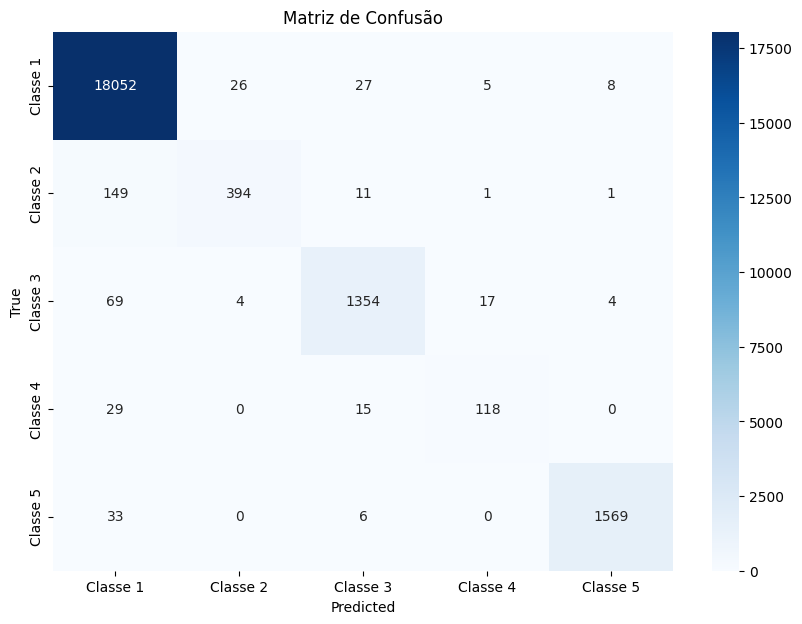

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best, annot=True, fmt='g', cmap='Blues', xticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'], yticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Matriz de Confusão')
plt.show()

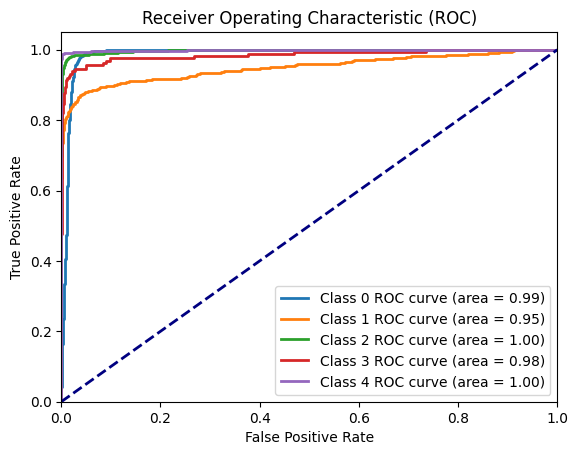

In [ ]:
n_classes = len(set(y_test))
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob_best[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
joblib.dump(best_pipeline, 'svm.joblib')

['svm.joblib']

In [11]:
best_pipeline = joblib.load('svm.joblib')

In [13]:
y_pred_best = best_pipeline.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Acurácia do modelo carregado: {accuracy:.3f}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo carregado: 0.982
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     18118
         1.0       0.93      0.71      0.80       556
         2.0       0.96      0.94      0.95      1448
         3.0       0.84      0.73      0.78       162
         4.0       0.99      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.94      0.87      0.90     21892
weighted avg       0.98      0.98      0.98     21892

